In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import mnist
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.


The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))

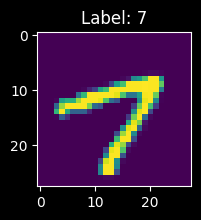

In [9]:
plot_sample(101)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(1600, activation="sigmoid", name="hidden_layer_1"),
        Dense(800, activation="sigmoid", name="hidden_layer_2"),
        Dense(400, activation="sigmoid", name="hidden_layer_3"),
        Dense(200, activation="sigmoid", name="hidden_layer_4"),
        Dense(100, activation="sigmoid", name="hidden_layer_5"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-03 13:47:56.778295: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-03 13:47:56.778334: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-03 13:47:56.778346: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-03 13:47:56.778392: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 13:47:56.778417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1600)              1256000   
                                                                 
 hidden_layer_2 (Dense)      (None, 800)               1280800   
                                                                 
 hidden_layer_3 (Dense)      (None, 400)               320400    
                                                                 
 hidden_layer_4 (Dense)      (None, 200)               80200     
                                                                 
 hidden_layer_5 (Dense)      (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 10)                1010    

In [14]:
optimizer = Adam()
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_ann_logs", histogram_freq=1, write_images=True
)
epochs = 10
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[ann_checkpoint_callback, ann_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:47:58.041713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.8318

2023-08-03 13:48:33.955117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1688/1688 [==============================] - 39s 22ms/step - loss: 0.5499 - accuracy: 0.8318 - val_loss: 0.1722 - val_accuracy: 0.9542
Epoch 2/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1677 - accuracy: 0.9530 - val_loss: 0.1155 - val_accuracy: 0.9688
Epoch 3/10
1688/1688 [==============================] - 36s 22ms/step - loss: 0.1095 - accuracy: 0.9685 - val_loss: 0.0862 - val_accuracy: 0.9748
Epoch 4/10
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0788 - accuracy: 0.9771 - val_loss: 0.0959 - val_accuracy: 0.9710
Epoch 5/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0608 - accuracy: 0.9824 - val_loss: 0.0727 - val_accuracy: 0.9797
Epoch 6/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.1069 - val_accuracy: 0.9738
Epoch 7/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0389 - accuracy: 0.9885 - val_loss: 0.0733 - val_accura

In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.11272187661379576
Validation loss: 0.09615486487746239
0.966581 Training accuracy with a standard deviation of 0.046510
0.974683 Validation accuracy with a standard deviation of 0.008179


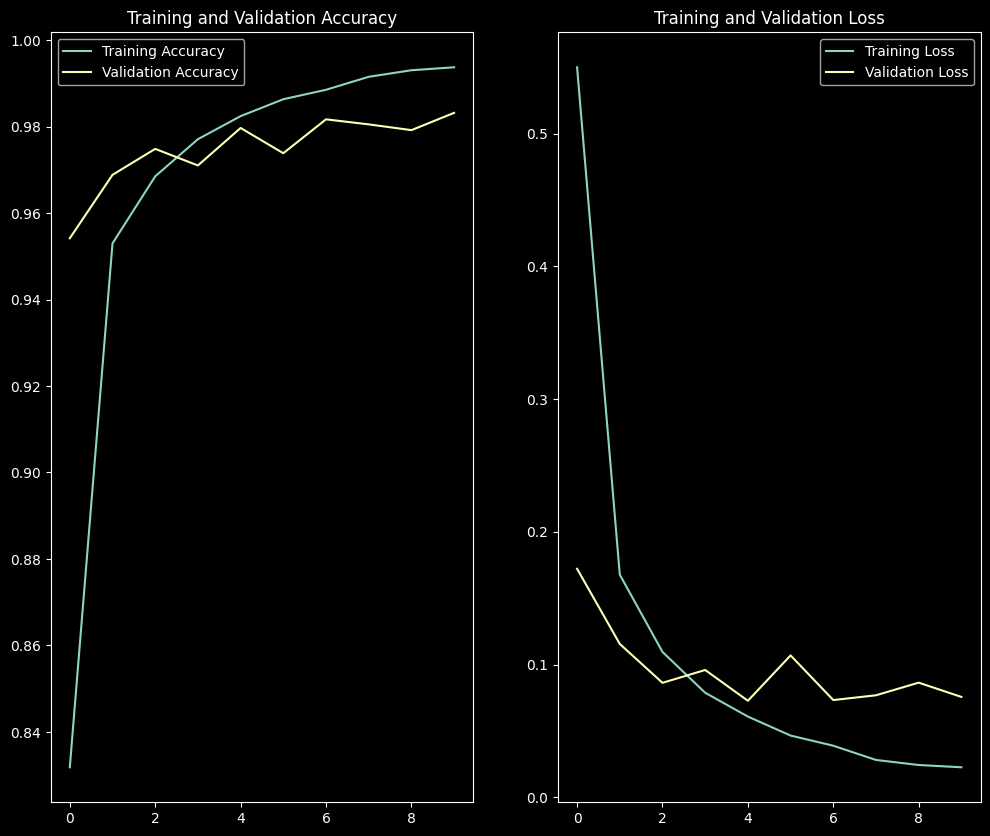

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.0978 - accuracy: 0.9780
Test loss: 0.09777214378118515
Test accuracy: 0.9779999852180481


In [19]:
y_pred = ann.predict(X_test)

  7/313 [..............................] - ETA: 2s  

2023-08-03 13:56:01.761528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        AveragePooling2D((2, 2), name="pooling_layer_1"),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", name="conv_layer_2"),
        AveragePooling2D((2, 2), name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(1600, activation="sigmoid", name="dense_layer_1"),
        Dense(800, activation="sigmoid", name="dense_layer_2"),
        Dense(400, activation="sigmoid", name="dense_layer_3"),
        Dense(200, activation="sigmoid", name="dense_layer_4"),
        Dense(100, activation="sigmoid", name="dense_layer_5"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_layer_1 (AveragePo  (None, 13, 13, 32)        0         
 oling2D)                                                        
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_layer_2 (AveragePo  (None, 5, 5, 64)          0         
 oling2D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 1600)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 1600)              2561600 

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[cnn_checkpoint_callback, cnn_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:56:08.304984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 2.3080 - accuracy: 0.1068

2023-08-03 13:57:09.067704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 68s 39ms/step - loss: 2.3080 - accuracy: 0.1068 - val_loss: 2.3043 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 63s 37ms/step - loss: 2.3035 - accuracy: 0.1085 - val_loss: 2.3029 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 56s 33ms/step - loss: 2.3031 - accuracy: 0.1086 - val_loss: 2.3047 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 56s 33ms/step - loss: 2.3028 - accuracy: 0.1089 - val_loss: 2.3020 - val_accuracy: 0.1113
Epoch 5/10
1688/1688 [==============================] - 56s 33ms/step - loss: 2.3026 - accuracy: 0.1092 - val_loss: 2.3031 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 55s 33ms/step - loss: 2.3025 - accuracy: 0.1094 - val_loss: 2.3024 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 56s 33ms/step - loss: 2.3024 - accuracy: 0.1120 - val_loss: 2.3027 - val_accura

In [25]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 2.30323007106781
Validation loss: 2.3034560441970826
0.109378 Training accuracy with a standard deviation of 0.001336
0.104917 Validation accuracy with a standard deviation of 0.003023


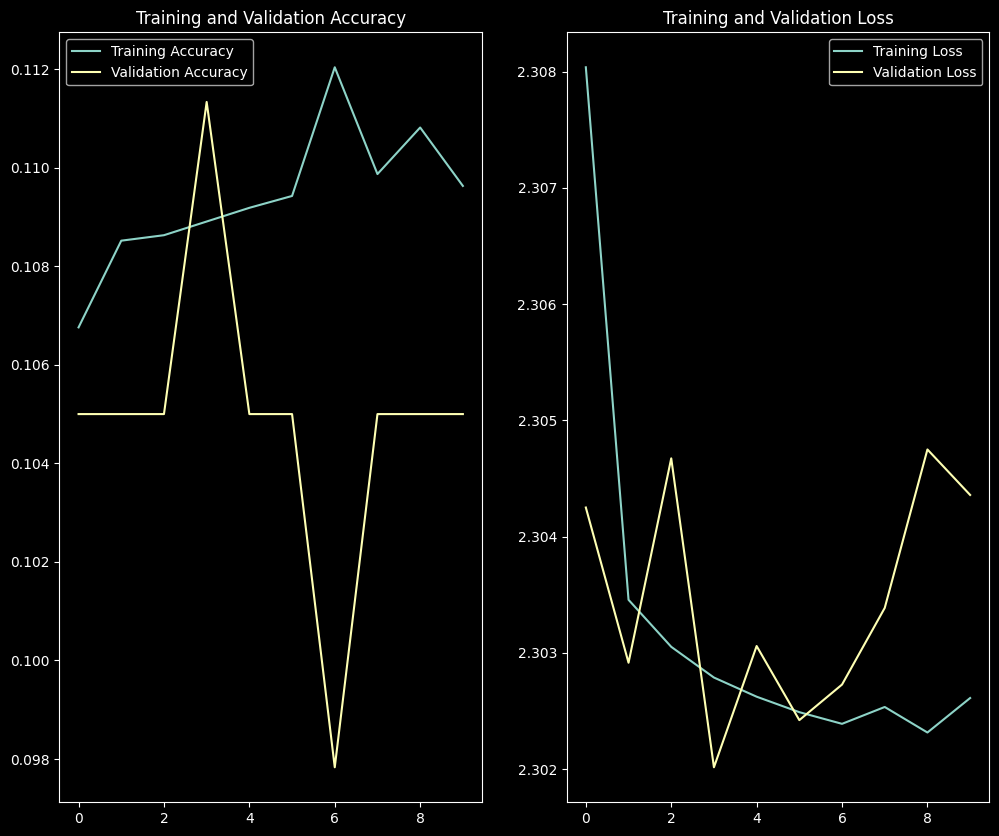

In [26]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.1135
Test loss: 2.302713394165039
Test accuracy: 0.11349999904632568


In [28]:
y_pred = cnn.predict(X_test)

 34/313 [==>...........................] - ETA: 0s

2023-08-03 14:05:11.428631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
